# Google Cloud Platform Tutorial
## Introduction

The Google Cloud Platform follows a Software as a Service (SaaS) model to provide cloud computing resources to clients. Cloud computing is basically computing (storing, managing, processing data) from a remote server hosted on the internet, in contrast to computing on a local computer. Cloud computing provides a lot of benefits, including allowing clients to abstract away from server issues and focus on their attention on the specific problem they are working on. The Google Cloud Platform appears to be very reliable, as they are trusted by reputable companies such as Spotify, Snapchat, and NY Times, just to name a few.

It turns out that the Google Cloud Platform is extremely powerful for data scientists. In one case, data scientists can use the platform to store and quickly access huge datasets, without ever having to worry about server infrastructure. The Google BigQuery application, which is designed for large-scale data analysis, is an example of this. Other incredibly useful services include Cloud Machine Learning, Natural Language API, Cloud Datalab (which is like a Jupyter notebook!), among many others (see: https://cloud.google.com/data-science/).

In this tutorial, we will discuss and demonstrate the use of the Google Cloud Platform for data science applications, particularly natural language processing. We will first walk through the set-up process, then run our data on the Natural Langugae API, and finally analyze our results. Since our main focus is on the Cloud library (and not data collection), we will use the Twitter dataset from homework 2 and 3.
 



## 1. Set-Up: Authentication and Installation
Since we are working with a SaaS API, the set-up may be a bit of a hassle. In particular, we have to register for an account to get API keys. Google claims that we will not be charged during the 60-day free trial period (and there are no recurring charges), though a credit card is needed to verify identity (see: https://cloud.google.com/free-trial/). Creating an account should not be necessary to follow this tutorial, although the code will most likely not run otherwise. Only make an account if you feel comfortable doing so! 

### Authentication
First, we go to https://cloud.google.com/free-trial/ to start our free trial. On the dashboard, click on the box with the header 'Use Google APIs.' On the left panel, click 'Credentials' and then 'Create credentials' with the 'Service Account Key' option. Choose 'App Engine Service Default Account,' and make sure that you create a .json file. After the credentials file is create, we need to set our local environment variable GOOGLE_APPLICATION_CREDENTIALS to the filepath to our json file. We will do this in python code below. Finally, be sure to enable the Natural Language Processing API. We can do this by clicking on API Manager, then the 'Enable API' button, and then a search for the 'Google Cloud Natural Language API.' On the Natural Language API page, click "Enable!"

### Installation
Next, we need to install the Google API Python Client. We can do this easily with pip, with the command "pip install --upgrade google-api--python-client" in our terminal. Other methods of installation can be found at https://developers.google.com/api-client-library/python/start/installation.

Now that we have finished these two steps, we will write an authentication function below that returns a service object. Please replace the global string config_filepath with the filepath to your config JSON file.


In [42]:
# NOTE: Some code adapted from Google's Sentiment Analysis Tutorial

from googleapiclient import discovery
import httplib2
from oauth2client.client import GoogleCredentials
import sys,os,os.path

# REPLACE THIS WITH YOUR CONFIG FILEPATH!
config_filepath = "/Users/kevinyang/Documents/15388/tutorial/app_engine_defaults_credentials.json"

# Set Environment Variable
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = config_filepath

DISCOVERY_URL = ('https://{api}.googleapis.com/'
                 '$discovery/rest?version={apiVersion}')

def authenticate():
    '''Authenticate using GoogleCredentials and return service object'''
    http = httplib2.Http()
    credentials = GoogleCredentials.get_application_default().create_scoped(
      ['https://www.googleapis.com/auth/cloud-platform'])
    http=httplib2.Http()
    credentials.authorize(http)
    service = discovery.build('language', 'v1beta1',
                            http=http, discoveryServiceUrl=DISCOVERY_URL)
    return service
    

## 2. Natural Language Processing
Now that we have finally finished setting up our system, we can move on to actually using our new API! Google's Natural Language Processing API has three main features: entity recognition, sentiment analysis, and syntax analysis. Entity recognition identifies entities, i.e. people, places, events, and the like. Sentiment analysis is focused on subjective aspects of text, and Google's API represents this in the form of polarity and magnitude. Syntax analysis analyzes the grammatical structure of text, for example by labeling nouns and verbs. In this tutorial, we will focus on sentiment analysis and entity recognition.

### Our First API Call: Sentiment Analysis
Below, we will write a function called process that takes in a string and returns the  sentiment analysis from Google's API. 

In [43]:
# NOTE: Some code adapted from Google's Sentiment Analysis Tutorial

def analyze_sentiment(text):
    """ Run sentiment analysis on text
    Inputs:
        text (string): text to be analyzed
    Outputs:
        JSON Object: Object containing sentiment analysis response
    """
    service = authenticate()
    
    service_request = service.documents().analyzeSentiment(
    body={
      'document': {
         'type': 'PLAIN_TEXT',
         'content': text,
      }
    })
    
    response = service_request.execute()
    
    return response

In [44]:
# TEST analyze_sentiment
response = analyze_sentiment("I love this API!")
print "RESPONSE JSON:", response
polarity = response['documentSentiment']['polarity']
magnitude = response['documentSentiment']['magnitude']
language = response['language']
print('Sentiment: polarity of %s with magnitude of %s' % (polarity, magnitude))
print('Language: %s' % (language))


RESPONSE JSON: {u'documentSentiment': {u'polarity': 1, u'magnitude': 0.9}, u'language': u'en'}
Sentiment: polarity of 1 with magnitude of 0.9
Language: en


Awesome! From our output, we can see that the sentence `"I love this API!"` has a polarity of 1 and a magnitude of 0.5. Polarity ranges from -1 (very negative) to +1 (very positive), and magnitude ranges from 0 to infinity. Polarity describes the sentiment, whereas magnitude describes the strength of the sentiment, regardless of what the sentiment actually is. This means that this sentence is very positive (polarity of 1), and that this positive sentiment has a strength of 0.5. Furthermore, we see that the API was able to recognize that we are writing in English. According to the documentation, Google's NLP API is able to handle English, Spanish, and Japanese inputs, although sentiment analysis currently only works on English.

### Entity Recognition
Similarly, we can create a function that recognizes entities. According to the Google documentation, there are exactly 8 kinds of classifications: Unknown, Person, Location, Organization, Event, Work of Art, Consumer goods, and Other Types. Below, we will write a function called `recognize_entity` that takes in a string and returns Google's entity analysis.

In [45]:
def recognize_entity(text):
    """ Run entity recognition on text
    Inputs:
        text (string): text to be analyzed
    Outputs:
        JSON Object: Object containing entity recognition response
    """
    service = authenticate()
    
    service_request = service.documents().analyzeEntities(
    body={
      'document': {
         'type': 'PLAIN_TEXT',
         'content': text,
      }
    })
    
    response = service_request.execute()
    
    return response

In [46]:
# Test recognize_entity
response = recognize_entity("Google's API is useful for Kevin's CMU project in Pittsburgh");
print response["entities"]

[{u'salience': 0.38069808, u'mentions': [{u'text': {u'content': u'Google', u'beginOffset': -1}}], u'type': u'ORGANIZATION', u'name': u'Google', u'metadata': {u'wikipedia_url': u'http://en.wikipedia.org/wiki/Google'}}, {u'salience': 0.12342409, u'mentions': [{u'text': {u'content': u'Kevin', u'beginOffset': -1}}], u'type': u'PERSON', u'name': u'Kevin', u'metadata': {}}, {u'salience': 0.057269711, u'mentions': [{u'text': {u'content': u'Pittsburgh', u'beginOffset': -1}}], u'type': u'LOCATION', u'name': u'Pittsburgh', u'metadata': {u'wikipedia_url': u'http://en.wikipedia.org/wiki/Pittsburgh'}}, {u'salience': 0.043095242, u'mentions': [{u'text': {u'content': u'CMU', u'beginOffset': -1}}], u'type': u'ORGANIZATION', u'name': u'CMU', u'metadata': {u'wikipedia_url': u'http://en.wikipedia.org/wiki/Carnegie_Mellon_University'}}]


Success! The output printed above is a list of JSON objects, each representing an entity. We see that the model was able to recognize the organizations Google and CMU (Carnegie Mellon), the person Kevin, and the location Pittsburgh. The salience describes the importance of the entity as a number in the range [0, 1.0]. In the metadata, we notice that Google provides a Wikipedia URL to the entity it found. The mentions is a JSON list containing each mention of the entity and its position.  

Immediately, we can see the value of the google api client. Instead of constructing our own models, we can choose to rely on Google's models to develop analyses quickly. Further, using the API we were able to correctly identify and classify each entity in our test sentence, even acronyms like CMU. Furthermore, Google provides us with a salience value for us to better evaluate the entity structures of sentences.

## 3. Putting Everything Together: Processing and Analysis
Now that we have functions that can properly call the API, the next step toward mastering the API usage is effectively processing and parsing the output. The API response variables are given as JSON objects, so we can need to make sure our functions parse the JSON results properly. Our goal is to be able to analyze the tweets in the file `tweets.csv`, so first we would like to convert the csv into a pandas dataframe. Afterwards, we will then write functions that, given a dataframe containing the screen_name and text, creates new columns corresponding to our language processing.

In [56]:
import pandas as pd

tweets = pd.read_csv("tweets.csv", na_filter=True)

# Get tweets from donald trump and mike pence
donald_tweets = tweets.loc[tweets['screen_name'] == "realDonaldTrump"]
pence_tweets = tweets.loc[tweets['screen_name'] == "mike_pence"]

print donald_tweets.head()
print pence_tweets.head()

       screen_name                      created_at  retweet_count  \
0  realDonaldTrump  Fri Sep 09 02:00:32 +0000 2016           2859   
1  realDonaldTrump  Fri Sep 09 00:39:36 +0000 2016           6463   
2  realDonaldTrump  Thu Sep 08 23:56:22 +0000 2016           5405   
3  realDonaldTrump  Thu Sep 08 19:52:32 +0000 2016          11633   
4  realDonaldTrump  Thu Sep 08 18:17:01 +0000 2016           3824   

   favorite_count                                               text  
0            7030  Final poll results from NBC on last nights Com...  
1           17951  It wasn't Matt Lauer that hurt Hillary last ni...  
2           13223  More poll results from last nights Commander-i...  
3           27028  Last nights results - in poll taken by NBC. #A...  
4           12567  With Luis, Mexico and the United States would ...  
    screen_name                      created_at  retweet_count  \
114  mike_pence  Sat Sep 17 18:24:18 +0000 2016            574   
115  mike_pence  Sat Sep 17

In [57]:
import numpy as np

def process_sentiment(tweets_df):
    """ Processes tweets and creates new columns polarity and magnitude
    Inputs:
        tweets_df: dataframe of tweets containing screen_name and text
    Outputs:
        Pd.dataframe: dataframe with new columns containing processed results
    """
    polList = []
    magList = []
    
    for (index,row) in tweets_df.iterrows():
        curr_tweet = row["text"]
        try:
            sentiment_resp = analyze_sentiment(curr_tweet)
        except:
            # on error, add None values to be removed later
            polList.append(None)
            magList.append(None)
            continue
            
        curr_pol = sentiment_resp['documentSentiment']['polarity']
        curr_mag = sentiment_resp['documentSentiment']['magnitude']
        
        polList.append(curr_pol)
        magList.append(curr_mag)
        
    # add new columns
    tweets_df = tweets_df.assign(polarity = polList)
    tweets_df = tweets_df.assign(magnitude = magList)
    return tweets_df.dropna() # remove rows with None

In [58]:
processed_donald = process_sentiment(donald_tweets)
print processed_donald.head()
processed_pence = process_sentiment(pence_tweets)
print processed_pence.head()


       screen_name                      created_at  retweet_count  \
0  realDonaldTrump  Fri Sep 09 02:00:32 +0000 2016           2859   
1  realDonaldTrump  Fri Sep 09 00:39:36 +0000 2016           6463   
2  realDonaldTrump  Thu Sep 08 23:56:22 +0000 2016           5405   
3  realDonaldTrump  Thu Sep 08 19:52:32 +0000 2016          11633   
4  realDonaldTrump  Thu Sep 08 18:17:01 +0000 2016           3824   

   favorite_count                                               text  \
0            7030  Final poll results from NBC on last nights Com...   
1           17951  It wasn't Matt Lauer that hurt Hillary last ni...   
2           13223  More poll results from last nights Commander-i...   
3           27028  Last nights results - in poll taken by NBC. #A...   
4           12567  With Luis, Mexico and the United States would ...   

   polarity  magnitude  
0       1.0        1.8  
1      -0.9        0.9  
2       1.0        0.8  
3       1.0        0.6  
4       1.0        0.9  
  

### Processing Entities
For processing the entities mentioned in tweets, we might be interested in the aggregate usage of entities. Namely, we might want to determine which entities are cited most frequently, and which have the highest salience. For this, we will take advantage of the `recognize_entity` function we wrote earlier. We will write a function that takes in a dataframe and returns a dictionary containing the total salience of the entities mentioned. To make counting easier, we will use the `collections.Counter` data structure.

In [50]:
from collections import Counter

def count_entities(tweets_df):
    """ Processes tweets and counts number of entities
    Inputs:
        tweets_df: dataframe of tweets containing screen_name and text
    Outputs:
        colletions.Counter: Counter containing counts of each entity
    """
    
    c = Counter()

    for (index,row) in tweets_df.iterrows():
        curr_tweet = row['text']
        entity_resp = None
        try:
            entity_resp = recognize_entity(curr_tweet)
        except:
            continue
            
        entity_list = entity_resp['entities']
        
        # sum together saliences of each entity
        for entity in entity_list:
            curr_salience = entity['salience']
            curr_name = entity['name']
            c[curr_name] += curr_salience
    return c; 

In [51]:
# count donald trump entities
count_trump = count_entities(donald_tweets)
count_pence = count_entities(pence_tweets)
print count_trump
print count_pence

Counter({u'Hillary Clinton': 1.509795915, u'AmericaFirst': 1.144681144, u'Hillary': 0.83077716, u'COMING UP @GenFlynn @newtgingrich': 0.80442244, u'@foxandfriends': 0.7124474000000001, u'RT': 0.6023972, u'Mexico': 0.5671262699999999, u'Pensacola': 0.53012615, u'Peter': 0.51027858, u'ABC News': 0.43969032, u'America': 0.42884898, u'Donald Trump': 0.39351058, u'FL': 0.3664639, u'NBC': 0.34692566999999996, u'@adhd_fa': 0.33184418, u'CommanderInChiefForum': 0.25466868, u'Luis': 0.24991031, u'@DanScavino': 0.18772775, u'Pe\xf1a Nieto': 0.1495229, u'@PARISDENNARD': 0.14829391, u'https://t.co/Rcu6KaRGCB': 0.14378344, u'United States': 0.12600546, u'https://t.co/JCO7Za78tV https://t.co/LYmpRyY0Hq': 0.10340992, u'CNN': 0.084421538, u'@realDonaldTrump': 0.053598814, u'American': 0.05349119, u'Matt Lauer': 0.050581474, u'ImWithYou https://t.co/sCOnny1fl3': 0.048856329, u'ImWithYou': 0.041910764, u'TrumpTrain https://t.co/FxyBL6fO1h': 0.039477881, u'MAGA https://t.co/5FmxGtLkwt': 0.03883845, u'Ame

### Donald Trump vs. Mike Pence: A Comparison
Now we have reached a point where we can begin to analyze our results. While we aren't going to directly compare the presidential candidates Donald Trump and Hillary Clinton due to data availability, we will instead visualize the differences between the U.S. president and vice president candidates, Donald Trump and Mike Pence. Arguably, the candidates are different in notable ways, though I suppose only the data will tell...

As of now, we have two dataframes containing sentiment analysis results, one for Trump and another for Pence. We also have two entity counter objects for both Trump and Pence. To aggregate our sentiment analysis, we will calculate a total sentiment index for each candidate. For an aggregate sentiment indicator, we will calculate the sum of `polarity*magnitude` values, meaning that a higher indicator value means more positivity. To compare entity distributions, we will display two bar charts.

We will write two functions, `aggregate_sentiment` that calculates the aggregate sentiment, and `create_bar` that displays a bar chart, given a counter.


In [54]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

def aggregate_sentiment(sentiment_df):
    """ Calculates aggregate sentiment indicator
    Inputs:
        sentiment_df: dataframe of tweets containing polarity and magnitude
    Outputs:
        Float: Aggregate sentiment indicator
    """
    total = 0
    for (index,row) in sentiment_df.iterrows():
        pol = row['polarity']
        mag = row['magnitude']
        total += pol * mag
    return total

def create_bar(counter, top_count, title):
    """ Calculates aggregate sentiment indicator
    Inputs:
        counter: counter object containing counts of each entity
        top_count: number of elemnts to graph
        title: title of graph
    Outputs:
        None
    """
    counterList = counter.most_common(top_count)
    entity_list = []
    count_list = []
    for k,v in counterList:
        entity_list.append(k)
        count_list.append(v)
    fig, ax = plt.subplots()
    x = np.arange(len(count_list))
    plt.bar(x, count_list, align="center", alpha = .5)
    plt.xticks(x,entity_list)
    
    ax.set_ylabel('Salience')
    ax.set_xlabel('Entity')
    ax.set_title(title)
    plt.show()  

Donald Sentiment: 10.66
Pence Sentiment: 11.21


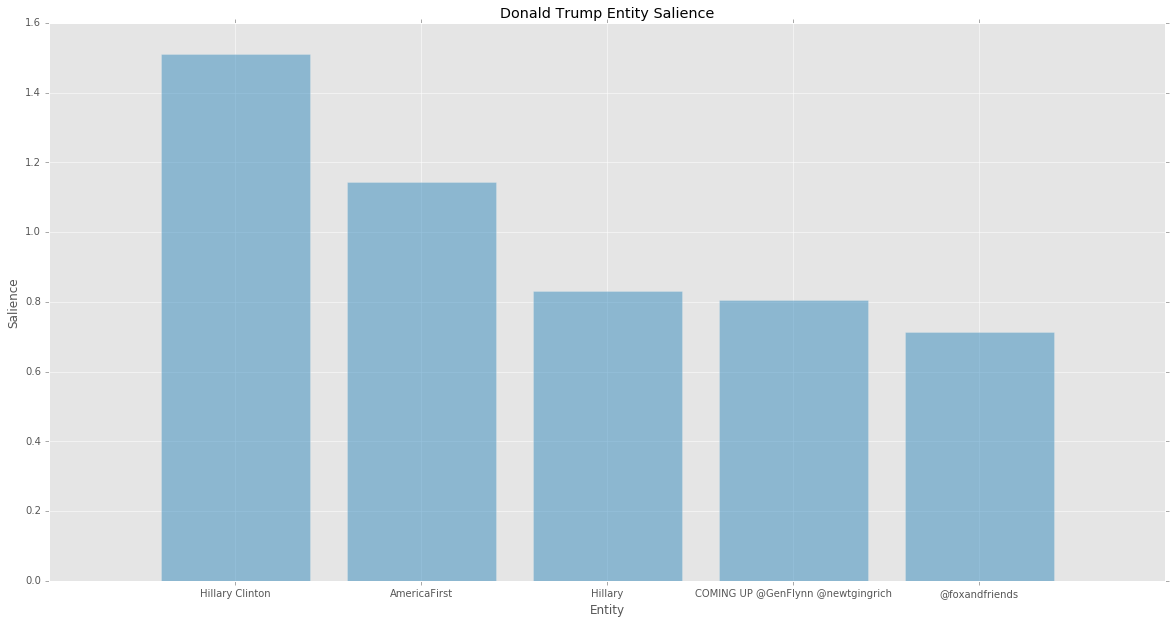

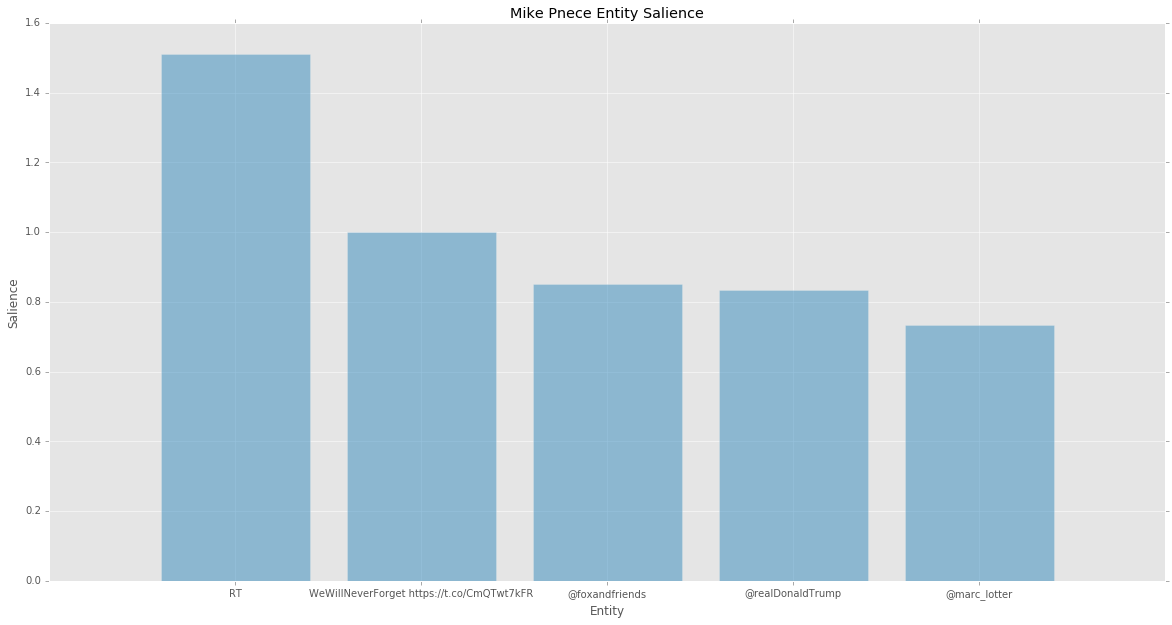

In [59]:
donald_sentiment = aggregate_sentiment(processed_donald)
pence_sentiment = aggregate_sentiment(processed_pence)

print "Donald Sentiment:", donald_sentiment
print "Pence Sentiment:", pence_sentiment

create_bar(count_trump, 5, "Donald Trump Entity Salience")
create_bar(count_pence, 5, "Mike Pnece Entity Salience")

Awesome! We have successfully used Google Cloud's Natural Language Processing API to analyze tweets. For final results, we note that, according to our analysis on our small dataset, Pence is (slightly) more positive than Trump, so take that as you will. As for the entity analysis data, we see that Trump talks very often about "Hillary Clinton" and "Hillary," so no surprise there. We also see high mentions of "AmericaFirst," which is one of Donald's slogans. As for Pence, we see that the entities mentioned are very different from Trump's, perhaps based on the structure of Pence's tweets. In particular, Pence seems to retweet a lot, and Google recognizes "RT" as an entity. Furthermore, Pence seems to tag people often in his tweets, particularly "@foxandfriends" and "@realDonaldTrump." While the entities mentioned are very different between Trump and Pence (for example, Trump seems to mention Hillary often, while Pence doesn't), we might need deeper analysis on more data to draw more conclusions, as it is likely that Pence might simply have different tweeting habits (i.e., using RT) that affect the results. 

Congratulations on creating and running analyses using the Google Cloud Natural Language API!

### Further Resources
Using the resources provided through Google Cloud's API, we can expand upon our work further. For example, we can use Google's Prediction API to construct our own language prediction model, without having to use Google's built-in libraries. Essentially, we upload our own labeled data to Google's cloud database, and then run the prediction API to handle new inputs. Refer to the link here for more details: https://cloud.google.com/prediction/docs/sentiment_analysis. For more details on the API and other Google cloud resources, it will be useful to consult Google Cloud's documentation and overview webpages. For example, a great way to find a big overview of the ways to use Google Cloud for data science, see https://cloud.google.com/data-science/. Additionally, for the Natural Language API, an overview and demonstration of the API's functionality can be seen at https://cloud.google.com/natural-language/. Good luck!   